# Retrieve Mental Health Survey dataset, clean & transform, load into DB

In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as db
from dotenv import load_dotenv

In [2]:
# Load environment variables from .env file
load_dotenv()

# Access environment variables
survey_results_csv=os.environ.get('survey_results_csv')
db_elephant=os.environ.get('db_elephant')

# Import file and clean data

In [3]:
# create a dataframe from csv file (Note: get 'raw' file)
df = pd.read_csv(survey_results_csv)

In [4]:
# take a look at contents
print(df.shape)

(736, 33)


In [5]:
print(df.info)

<bound method DataFrame.info of                Timestamp   Age Primary streaming service  Hours per day  \
0     8/27/2022 19:29:02  18.0                   Spotify            3.0   
1     8/27/2022 19:57:31  63.0                   Pandora            1.5   
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0   Other streaming service            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer         Fav genre Explor

In [6]:
# make sure all columns are displayed
pd.set_option('display.max_columns', None)

# peek at df
print(df.head())

            Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages    BPM Frequency [Classical] Frequency [Country]  \
0               Yes  156.0                Rarely  

In [7]:
# check 'Permissions' values. If only 1 unique value, drop the column
print(df['Permissions'].unique())

['I understand.']


In [8]:
# check nulls 
total_nulls = df.isnull().sum()
print(total_nulls)

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [9]:
# check the rows where 'Music Effects' is null to consider dropping the rows
null_rows = df.loc[df['Music effects'].isnull()]
print(null_rows)

              Timestamp   Age          Primary streaming service  \
0    8/27/2022 19:29:02  18.0                            Spotify   
1    8/27/2022 19:57:31  63.0                            Pandora   
161  8/28/2022 18:59:40  18.0            Other streaming service   
168  8/28/2022 19:16:43  19.0                            Spotify   
338   8/29/2022 8:28:46  21.0                      YouTube Music   
441  8/31/2022 18:56:31  21.0                        Apple Music   
532   9/2/2022 19:20:33  67.0  I do not use a streaming service.   
561    9/4/2022 5:22:34  21.0                            Spotify   

     Hours per day While working Instrumentalist Composer Fav genre  \
0              3.0           Yes             Yes      Yes     Latin   
1              1.5           Yes              No       No      Rock   
161            2.0           Yes              No       No     K pop   
168            3.0           Yes             Yes       No     K pop   
338            2.0           Yes

In [10]:
# check for duplicated rows
print(df[df.duplicated()])

Empty DataFrame
Columns: [Timestamp, Age, Primary streaming service, Hours per day, While working, Instrumentalist, Composer, Fav genre, Exploratory, Foreign languages, BPM, Frequency [Classical], Frequency [Country], Frequency [EDM], Frequency [Folk], Frequency [Gospel], Frequency [Hip hop], Frequency [Jazz], Frequency [K pop], Frequency [Latin], Frequency [Lofi], Frequency [Metal], Frequency [Pop], Frequency [R&B], Frequency [Rap], Frequency [Rock], Frequency [Video game music], Anxiety, Depression, Insomnia, OCD, Music effects, Permissions]
Index: []


In [11]:
# decide to drop rows where 'Music effects' has null values
df.dropna(subset=['Music effects'], inplace=True)

# confirm the rows where 'Music effects' has null values have been dropped
null_rows = df.loc[df['Music effects'].isnull()]
print(null_rows)

Empty DataFrame
Columns: [Timestamp, Age, Primary streaming service, Hours per day, While working, Instrumentalist, Composer, Fav genre, Exploratory, Foreign languages, BPM, Frequency [Classical], Frequency [Country], Frequency [EDM], Frequency [Folk], Frequency [Gospel], Frequency [Hip hop], Frequency [Jazz], Frequency [K pop], Frequency [Latin], Frequency [Lofi], Frequency [Metal], Frequency [Pop], Frequency [R&B], Frequency [Rap], Frequency [Rock], Frequency [Video game music], Anxiety, Depression, Insomnia, OCD, Music effects, Permissions]
Index: []


In [12]:
# decide to drop 'Timestamp' and 'Permissions' columns
df.drop(columns=['Timestamp', 'Permissions'], inplace=True)
print(df.head())

    Age Primary streaming service  Hours per day While working  \
2  18.0                   Spotify            4.0            No   
3  61.0             YouTube Music            2.5           Yes   
4  18.0                   Spotify            4.0           Yes   
5  18.0                   Spotify            5.0           Yes   
6  18.0             YouTube Music            3.0           Yes   

  Instrumentalist Composer         Fav genre Exploratory Foreign languages  \
2              No       No  Video game music          No               Yes   
3              No      Yes              Jazz         Yes               Yes   
4              No       No               R&B         Yes                No   
5             Yes      Yes              Jazz         Yes               Yes   
6             Yes       No  Video game music         Yes               Yes   

     BPM Frequency [Classical] Frequency [Country]  Frequency [EDM]  \
2  132.0                 Never               Never  Very freque

In [13]:
# reset the index
df.reset_index(drop=True, inplace=True)

In [14]:
print(df.head())

    Age Primary streaming service  Hours per day While working  \
0  18.0                   Spotify            4.0            No   
1  61.0             YouTube Music            2.5           Yes   
2  18.0                   Spotify            4.0           Yes   
3  18.0                   Spotify            5.0           Yes   
4  18.0             YouTube Music            3.0           Yes   

  Instrumentalist Composer         Fav genre Exploratory Foreign languages  \
0              No       No  Video game music          No               Yes   
1              No      Yes              Jazz         Yes               Yes   
2              No       No               R&B         Yes                No   
3             Yes      Yes              Jazz         Yes               Yes   
4             Yes       No  Video game music         Yes               Yes   

     BPM Frequency [Classical] Frequency [Country]  Frequency [EDM]  \
0  132.0                 Never               Never  Very freque

In [15]:
print(df.dtypes)

Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object
Frequency [Rock]                 object


In [16]:
# clean column names - change to lowercase, underscores
# extract list of column names
keys = list(df.columns)

# Create a dictionary {old: new}. New has lowercase, underscores, no square brackets
formatted_keys = {key: key.lower().replace(' ', '_').replace('[', '').replace(']', '').replace('&', '_n_') for key in keys}

# Replace old column names with new ones
df = df.rename(columns = formatted_keys)

In [17]:
# add column 'age_group'
age_group = pd.cut(df['age'],
                         bins=[0, 18, 35, 60, 75, 100],
                         labels=['early_years', 'young_adults', 'middle_age', 'mature_adults', 'elderly'], right = False)
df.insert(1, 'age_group', age_group)

In [18]:
# Change genre names to lower case and reflect Spotify values
df['fav_genre'] = df['fav_genre'].str.lower().str.replace('&', '-n-').str.replace(' ', '-')
df['fav_genre'].unique()

array(['video-game-music', 'jazz', 'r-n-b', 'k-pop', 'rock', 'country',
       'edm', 'hip-hop', 'pop', 'rap', 'classical', 'metal', 'folk',
       'lofi', 'gospel', 'latin'], dtype=object)

In [19]:
# Create a column with a count of occurrence of 'Very frequently' on each row
df['count'] = df.apply(lambda row: row.str.contains('Very frequently').sum(), axis=1)
# Verify column is created
df.head()

,age,age_group,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,frequency_classical,frequency_country,frequency_edm,frequency_folk,frequency_gospel,frequency_hip_hop,frequency_jazz,frequency_k_pop,frequency_latin,frequency_lofi,frequency_metal,frequency_pop,frequency_r_n_b,frequency_rap,frequency_rock,frequency_video_game_music,anxiety,depression,insomnia,ocd,music_effects,count
0,18.0,young_adults,Spotify,4.0,No,No,No,video-game-music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,3
1,61.0,mature_adults,YouTube Music,2.5,Yes,No,Yes,jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,2
2,18.0,young_adults,Spotify,4.0,Yes,No,No,r-n-b,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,4
3,18.0,young_adults,Spotify,5.0,Yes,Yes,Yes,jazz,Yes,Yes,86.0,Rarely,Sometimes,Never,Never,Never,Sometimes,Very frequently,Very frequently,Rarely,Very frequently,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,7
4,18.0,young_adults,YouTube Music,3.0,Yes,Yes,No,video-game-music,Yes,Yes,66.0,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,Sometimes,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,0


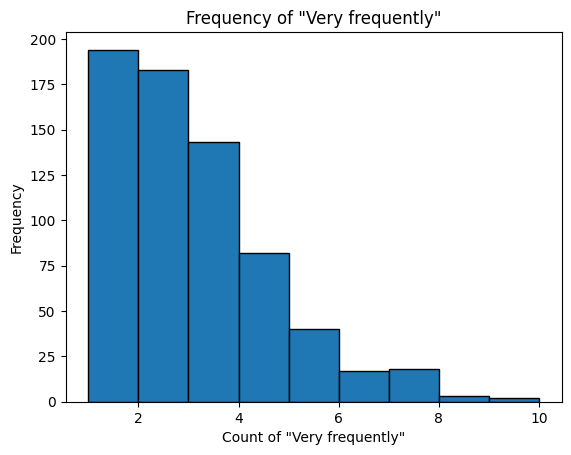

In [20]:
# Get a sense of the frequency where respondents listed more than 1 genre 'Very frequently'
df['count'].plot(bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], kind='hist', edgecolor='black')
plt.title('Frequency of "Very frequently"')
plt.xlabel('Count of "Very frequently"')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Decide to create 3 new cols per row and populate with the genres consumed 'Very frequently'
def find_frequencies(row):
    frequencies = [col for col in df.columns if row[col] == 'Very frequently']
    return pd.Series(frequencies + [None]*3)[:3]

# Apply the function to the DataFrame
df[['freq1', 'freq2', 'freq3']] = df.apply(find_frequencies, axis=1)

# Verify cols created
df.head()

,age,age_group,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,frequency_classical,frequency_country,frequency_edm,frequency_folk,frequency_gospel,frequency_hip_hop,frequency_jazz,frequency_k_pop,frequency_latin,frequency_lofi,frequency_metal,frequency_pop,frequency_r_n_b,frequency_rap,frequency_rock,frequency_video_game_music,anxiety,depression,insomnia,ocd,music_effects,count,freq1,freq2,freq3
0,18.0,young_adults,Spotify,4.0,No,No,No,video-game-music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,3,frequency_edm,frequency_k_pop,frequency_video_game_music
1,61.0,mature_adults,YouTube Music,2.5,Yes,No,Yes,jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,2,frequency_jazz,frequency_latin,None
2,18.0,young_adults,Spotify,4.0,Yes,No,No,r-n-b,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,4,frequency_hip_hop,frequency_k_pop,frequency_r_n_b
3,18.0,young_adults,Spotify,5.0,Yes,Yes,Yes,jazz,Yes,Yes,86.0,Rarely,Sometimes,Never,Never,Never,Sometimes,Very frequently,Very frequently,Rarely,Very frequently,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,7,frequency_jazz,frequency_k_pop,frequency_lofi
4,18.0,young_adults,YouTube Music,3.0,Yes,Yes,No,video-game-music,Yes,Yes,66.0,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,Sometimes,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,0,None,None,None


In [22]:
# Change genre values in freq1-3 to reflect Spotify values
for i in range(1,4):
    df[f'freq{i}'] = df[f'freq{i}'].str.replace('frequency_', '').str.replace('_', '-')

    print(df['freq3'].unique())

['frequency_video_game_music' None 'frequency_r_n_b' 'frequency_lofi'
 'frequency_rock' 'frequency_pop' 'frequency_metal' 'frequency_rap'
 'frequency_hip_hop' 'frequency_latin' 'frequency_gospel'
 'frequency_k_pop' 'frequency_jazz' 'frequency_edm' 'frequency_folk']
['frequency_video_game_music' None 'frequency_r_n_b' 'frequency_lofi'
 'frequency_rock' 'frequency_pop' 'frequency_metal' 'frequency_rap'
 'frequency_hip_hop' 'frequency_latin' 'frequency_gospel'
 'frequency_k_pop' 'frequency_jazz' 'frequency_edm' 'frequency_folk']
['video-game-music' None 'r-n-b' 'lofi' 'rock' 'pop' 'metal' 'rap'
 'hip-hop' 'latin' 'gospel' 'k-pop' 'jazz' 'edm' 'folk']


In [23]:
# Check for nulls in freq1
check_nulls = df['freq1'].isnull().sum()
print(check_nulls)

45


In [24]:
# Replace nulls in freq1 with value from fav_genre
df['freq1'] = df['freq1'].fillna(df['fav_genre'])

In [25]:
# Check for nulls in freq1 after replacement
check_nulls = df['freq1'].isnull().sum()
print(check_nulls)

0


In [26]:
# Add new column 'respondent' to be Primary Key in DB table
df.insert(0, 'respondent', range(101, 101 + len(df)))
list(df.columns)

['respondent',
 'age',
 'age_group',
 'primary_streaming_service',
 'hours_per_day',
 'while_working',
 'instrumentalist',
 'composer',
 'fav_genre',
 'exploratory',
 'foreign_languages',
 'bpm',
 'frequency_classical',
 'frequency_country',
 'frequency_edm',
 'frequency_folk',
 'frequency_gospel',
 'frequency_hip_hop',
 'frequency_jazz',
 'frequency_k_pop',
 'frequency_latin',
 'frequency_lofi',
 'frequency_metal',
 'frequency_pop',
 'frequency_r_n_b',
 'frequency_rap',
 'frequency_rock',
 'frequency_video_game_music',
 'anxiety',
 'depression',
 'insomnia',
 'ocd',
 'music_effects',
 'count',
 'freq1',
 'freq2',
 'freq3']

In [27]:
# Copy freq* cols to separate df as backup
df_freq = df[['respondent',
 'frequency_classical',
 'frequency_country',
 'frequency_edm',
 'frequency_folk',
 'frequency_gospel',
 'frequency_hip_hop',
 'frequency_jazz',
 'frequency_k_pop',
 'frequency_latin',
 'frequency_lofi',
 'frequency_metal',
 'frequency_pop',
 'frequency_r_n_b',
 'frequency_rap',
 'frequency_rock',
 'frequency_video_game_music']].copy()

In [28]:
df_freq.shape

(728, 17)

In [29]:
df_freq.head()

,respondent,frequency_classical,frequency_country,frequency_edm,frequency_folk,frequency_gospel,frequency_hip_hop,frequency_jazz,frequency_k_pop,frequency_latin,frequency_lofi,frequency_metal,frequency_pop,frequency_r_n_b,frequency_rap,frequency_rock,frequency_video_game_music
0,101,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently
1,102,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never
2,103,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely
3,104,Rarely,Sometimes,Never,Never,Never,Sometimes,Very frequently,Very frequently,Rarely,Very frequently,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never
4,105,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,Sometimes,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Never,Never,Sometimes


In [30]:
# Remove un-necessary cols from original df
df = df.drop(['count', 'frequency_classical',
 'frequency_country',
 'frequency_edm',
 'frequency_folk',
 'frequency_gospel',
 'frequency_hip_hop',
 'frequency_jazz',
 'frequency_k_pop',
 'frequency_latin',
 'frequency_lofi',
 'frequency_metal',
 'frequency_pop',
 'frequency_r_n_b',
 'frequency_rap',
 'frequency_rock',
 'frequency_video_game_music'], axis=1)

In [31]:
print(df.shape)

(728, 20)


In [32]:
df.head()

,respondent,age,age_group,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,anxiety,depression,insomnia,ocd,music_effects,freq1,freq2,freq3
0,101,18.0,young_adults,Spotify,4.0,No,No,No,video-game-music,No,Yes,132.0,7.0,7.0,10.0,2.0,No effect,edm,k-pop,video-game-music
1,102,61.0,mature_adults,YouTube Music,2.5,Yes,No,Yes,jazz,Yes,Yes,84.0,9.0,7.0,3.0,3.0,Improve,jazz,latin,None
2,103,18.0,young_adults,Spotify,4.0,Yes,No,No,r-n-b,Yes,No,107.0,7.0,2.0,5.0,9.0,Improve,hip-hop,k-pop,r-n-b
3,104,18.0,young_adults,Spotify,5.0,Yes,Yes,Yes,jazz,Yes,Yes,86.0,8.0,8.0,7.0,7.0,Improve,jazz,k-pop,lofi
4,105,18.0,young_adults,YouTube Music,3.0,Yes,Yes,No,video-game-music,Yes,Yes,66.0,4.0,8.0,6.0,0.0,Improve,video-game-music,None,None


In [33]:
list(df.columns)

['respondent',
 'age',
 'age_group',
 'primary_streaming_service',
 'hours_per_day',
 'while_working',
 'instrumentalist',
 'composer',
 'fav_genre',
 'exploratory',
 'foreign_languages',
 'bpm',
 'anxiety',
 'depression',
 'insomnia',
 'ocd',
 'music_effects',
 'freq1',
 'freq2',
 'freq3']

# Exploratory Data Analysis

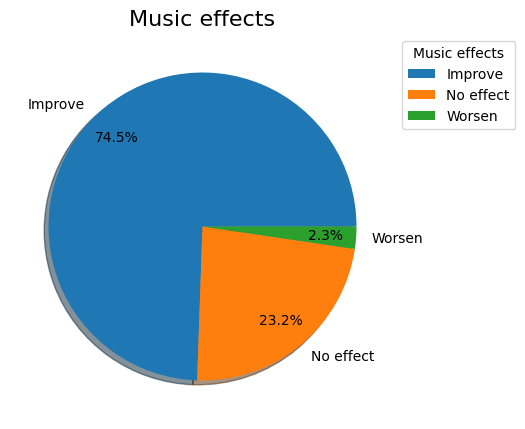

In [34]:
# Does music have an effect on mood?
sections = df['music_effects'].value_counts()
labels = sections.index.to_list()
plt.figure(figsize=(5,5))
plt.pie(sections, labels=labels,autopct='%.1f%%',shadow=True, pctdistance=0.8)
plt.title('Music effects', fontsize=16)
plt.legend(title='Music effects',loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

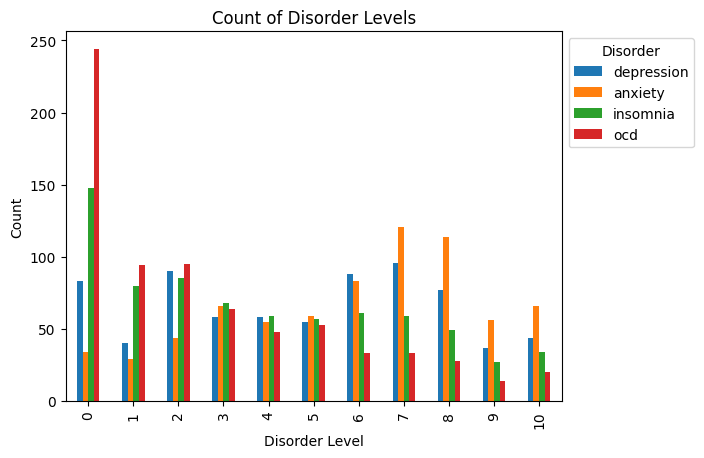

In [35]:
# Count of disorders

# Create a dictionary to store the counts
disorder_counts = {
    'depression': {},
    'anxiety': {},
    'insomnia': {},
    'ocd': {}
}

# Loop through the disorder columns
for disorder in ['depression', 'anxiety', 'insomnia', 'ocd']:
    # Get the value counts for the current disorder
    value_counts = df[disorder].value_counts()

    # Extract the counts for the desired categories
    for level in range(11):
        disorder_counts[disorder][level] = value_counts.get(level, 0)

# Create a DataFrame from the dictionary
df_disorder_counts = pd.DataFrame(disorder_counts)

# Plot the bar chart for each disorder
df_disorder_counts.plot(kind='bar')
plt.title('Count of Disorder Levels')
plt.xlabel('Disorder Level')
plt.ylabel('Count')
plt.legend(title='Disorder', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

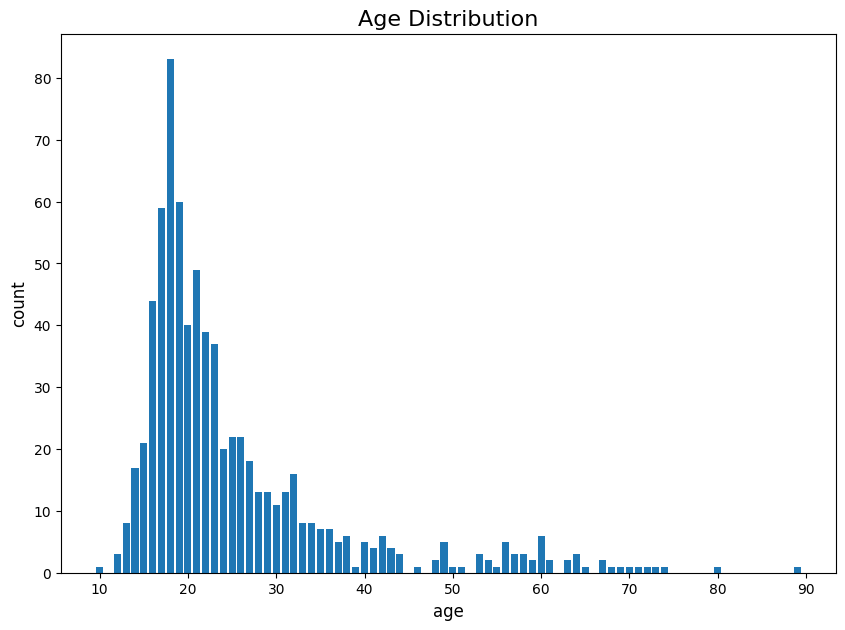

In [36]:
# Age anaylsis
labels = df['age'].value_counts().index.to_list()
sections = df['age'].value_counts().to_numpy()
plt.figure(figsize=(10, 7))
plt.bar(labels, sections)
plt.title('Age Distribution', fontsize=16)
plt.xlabel('age', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

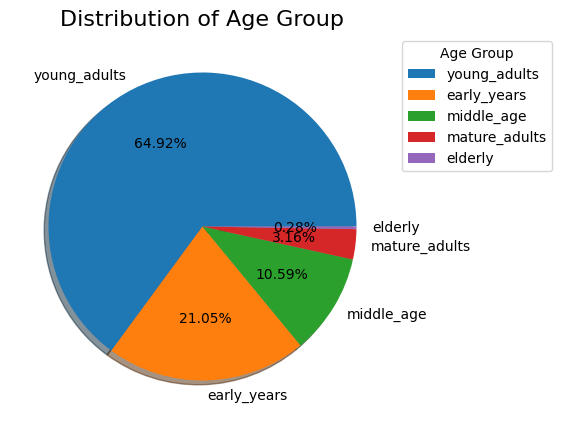

In [37]:
# Age group distribution
age_group_counts = df['age_group'].value_counts()
labels = age_group_counts.index.to_list()
plt.figure(figsize=(5,5))
plt.pie(age_group_counts, labels=labels,autopct='%.2f%%',shadow=True, pctdistance=0.6)
plt.title('Distribution of Age Group', fontsize=16)
plt.legend(title='Age Group', loc='upper left',bbox_to_anchor=(1,1))
plt.show()

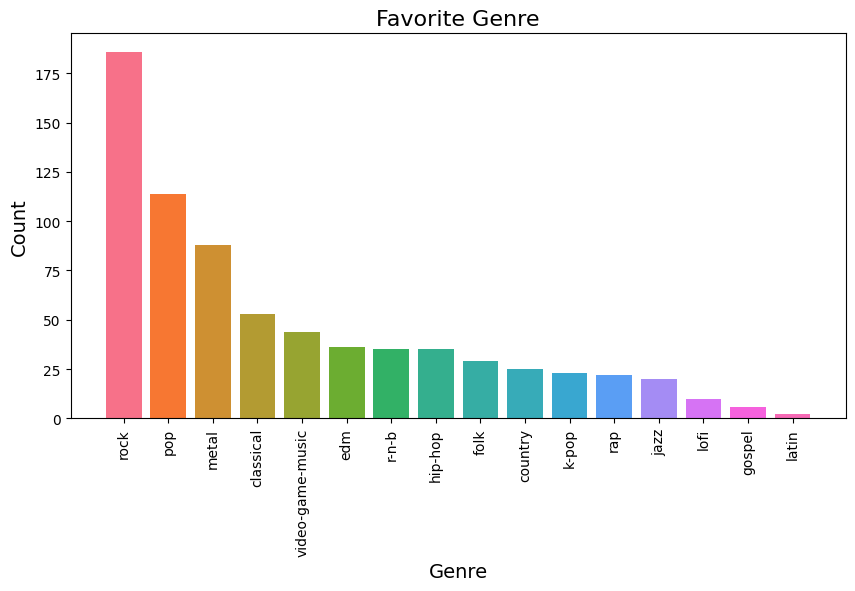

In [38]:
# Distribution of Favourite Genre
labels = df['fav_genre'].value_counts().index.to_list()
sections = df['fav_genre'].value_counts().to_numpy()
colors = sns.color_palette('husl', len(sections))
plt.figure(figsize=(10,5))
plt.bar(labels, sections, color=colors)
plt.title('Favorite Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.show()

## Connect to DB, create table and load data into DB

In [39]:
# Connect to DB
engine = db.create_engine(db_elephant) 
conn = engine.raw_connection()

In [44]:
# Create new table 'survey' in PostgreSQL (Create only 1 column, to_sql seems to create other columns automatically)
commands = ('''CREATE TABLE IF NOT EXISTS survey (
    respondent INT PRIMARY KEY
);''')
            
# Initialize connection to PostgreSQL
cur = conn.cursor()

# Create cursor to execute SQL commands
for command in commands:
    cur.execute(commands)

# Commit changes
conn.commit()

In [ ]:
# Copy data to table
df.to_sql(name= 'survey', con = conn, if_exists= 'replace', index= False)

In [ ]:
# Create new table 'frequency' in PostgreSQL
commands = ('''CREATE TABLE IF NOT EXISTS frequency (
    respondent INT PRIMARY KEY
);''')
            
# Initialize connection to PostgreSQL
cur = conn.cursor()

# Create cursor to execute SQL commands
#for command in commands:
cur.execute(commands)

# Commit changes
conn.commit()

In [ ]:
# Copy data to table
df_freq.to_sql(name= 'frequency', con = engine, if_exists= 'replace', index= False)

In [ ]:
# Close communication with server
cur.close()
conn.close()